In [1]:
import fepanalysis as fa
import importlib
importlib.reload(fa)

<module 'fepanalysis' from '/home/mruizmunevar@iit.local/IAMA_manuel/NKCC1/PROPS/IAMA_FEP_module/fepanalysis.py'>

In [2]:
campaign_name='FEP_campaign'
COMPS=['A04']
REPS=['rep1','rep2','rep3']

1. Binding mode RMSD analysis
- Here, our main goal is to assess if the compound suffered major changes in its binding mode
- If the binding mode was preserved, it is then safe to proceed

In [ ]:
fep_type='aces'

for comp in COMPS:
    for rep in REPS:
        fa.convert_traj(comp,rep,fep_type,fast=True)
        fa.calc_rmsd(comp,rep,fep_type,comp_mask='C1,C2,C3,C4,C5,N1,S1,O1,O2,N3,C13,O3')

A04 rep1


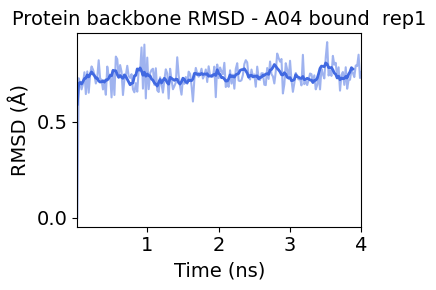

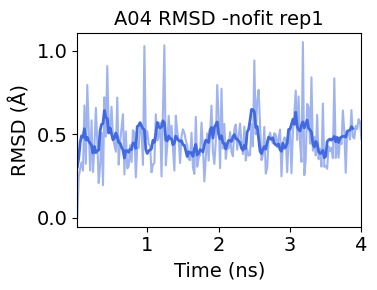

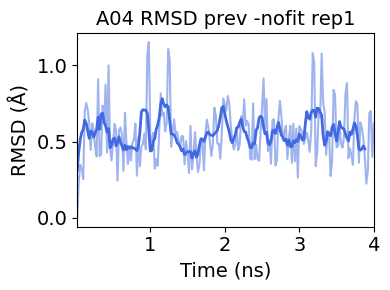

--------------------
A04 rep2


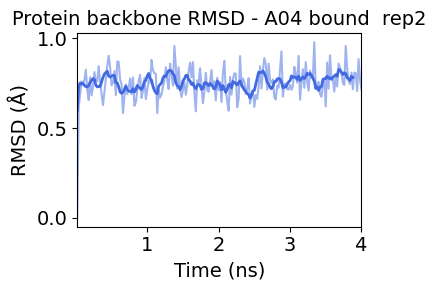

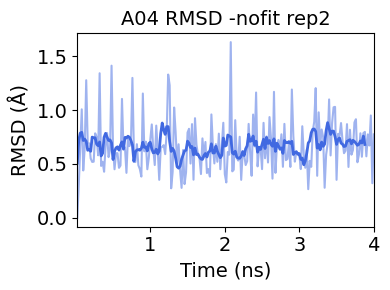

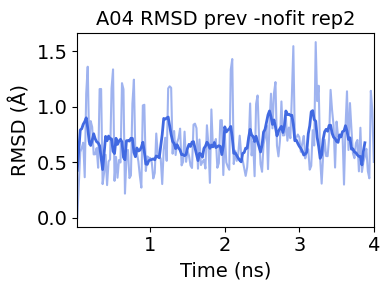

--------------------
A04 rep3


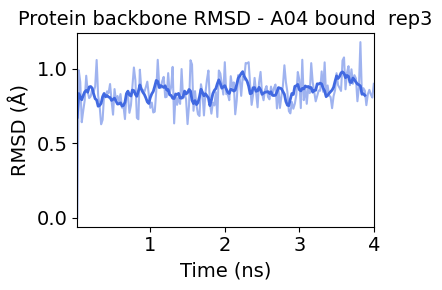

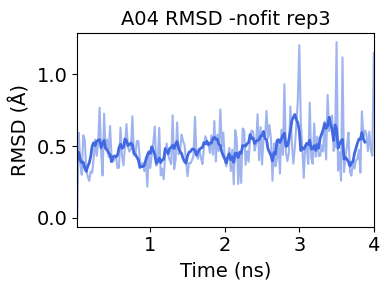

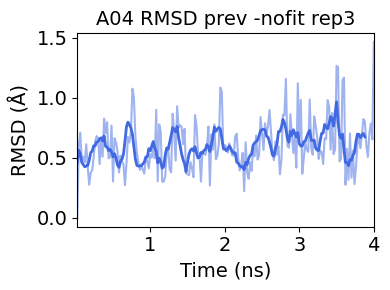

--------------------


In [4]:
for comp in COMPS:
    for rep in REPS:
        print(comp,rep)
        fa.plot_rmsd(comp,rep,'prot_bb',factor=50)
        fa.plot_rmsd(comp,rep,'lig',factor=50)
        fa.plot_rmsd(comp,rep,'lig_prev',factor=50)
        print('-'*20)

2. Calculate the ddG of the transformation
- Then, check the curves of the dU/dlambda, in case there are ddG disparities between replicas
    - Where does the curve deviate from other replicas? Is the issue in the second or first half of the transformation?
    - Check trajectory where curve deviates. What happens?
- Check for the convergence during each replica. Does the ddG fluctuate significantly or has it converged by the end of simulation?

In [5]:
REPS=['rep1','rep2','rep3','unbound']
data=fa.get_ddG_table(COMPS,REPS)

             A04
mean  +2.4 (0.1)
rep1        +2.4
rep2        +2.5
rep3        +2.4


A04


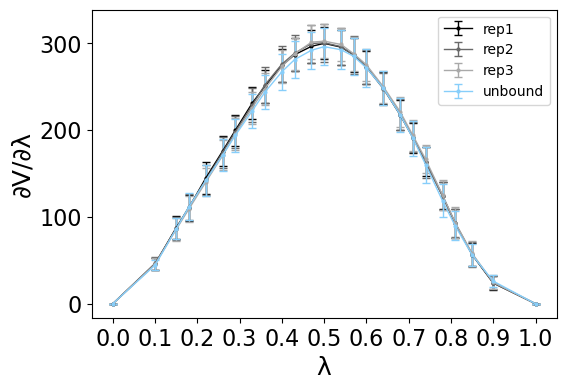

A04 rep1


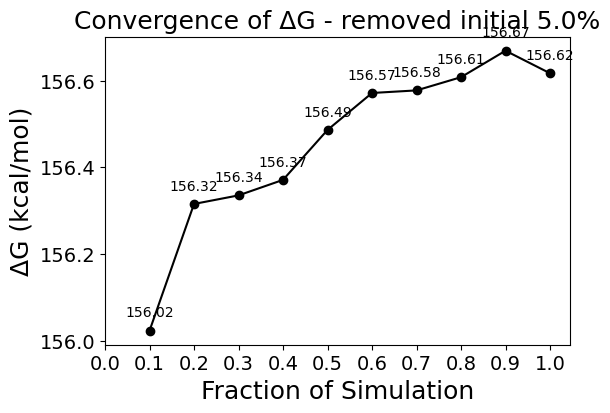

--------------------
A04 rep2


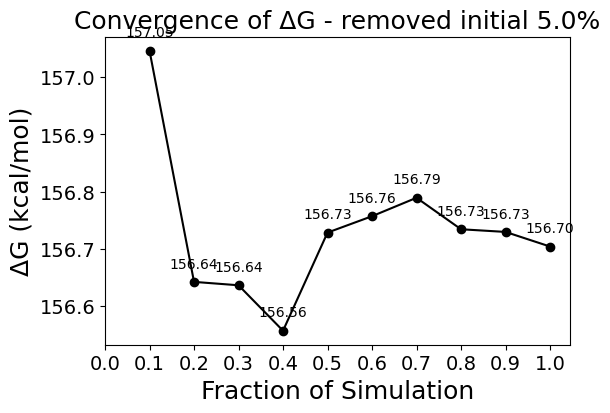

--------------------
A04 rep3


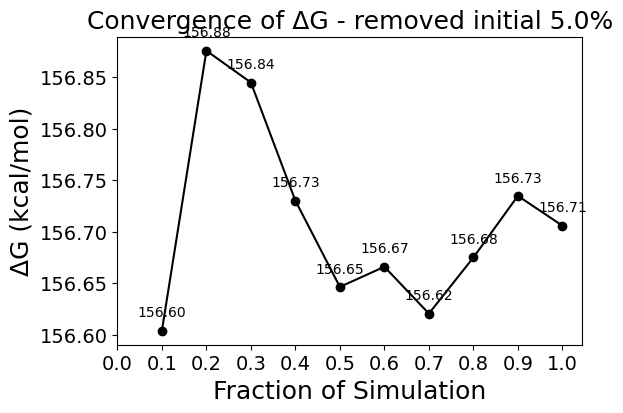

--------------------
A04 unbound


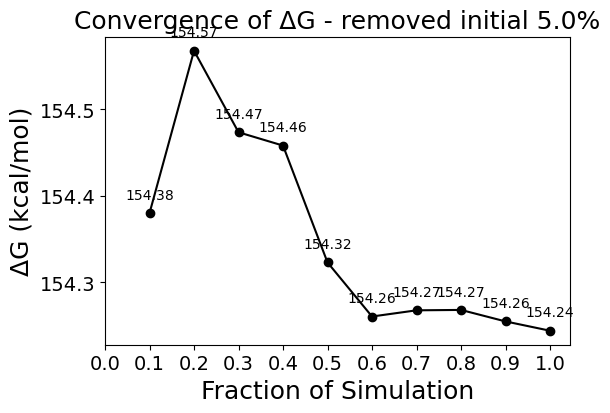

--------------------


In [7]:
fa.get_all_plots(COMPS,REPS)

For a more detailed view of the convergence, you can also see curves of dU/dlambda vs lambda of the first 10%, 20% and so on, to see how it evolves through the simulation time

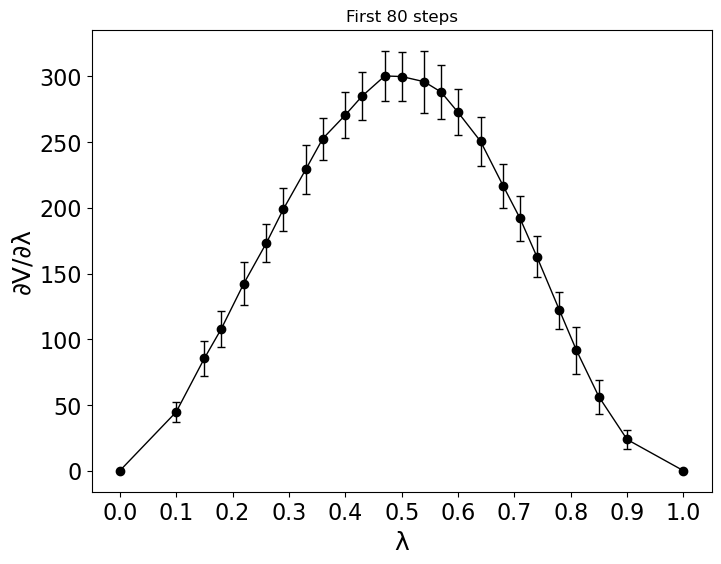

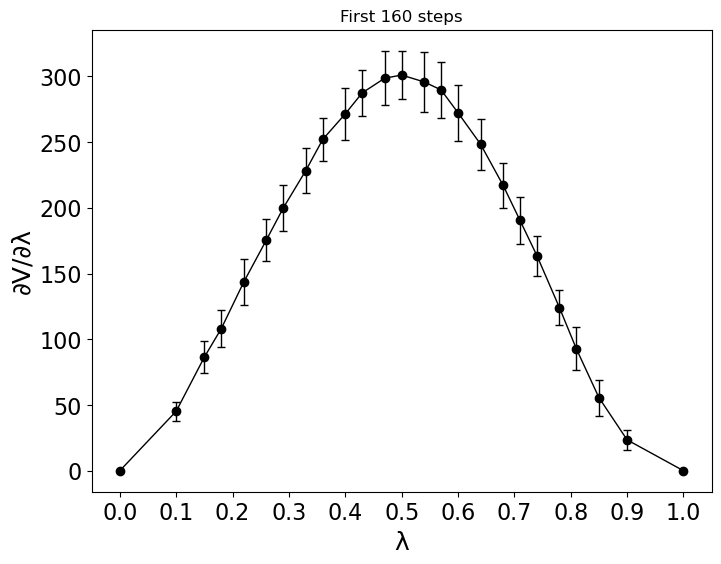

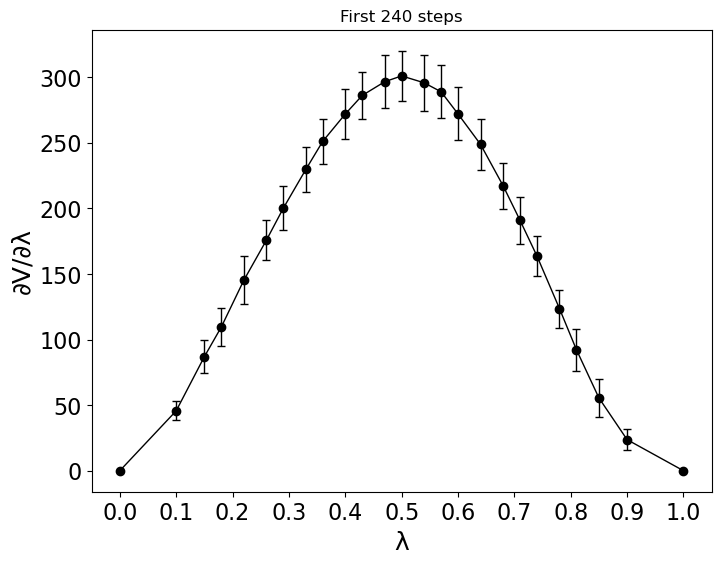

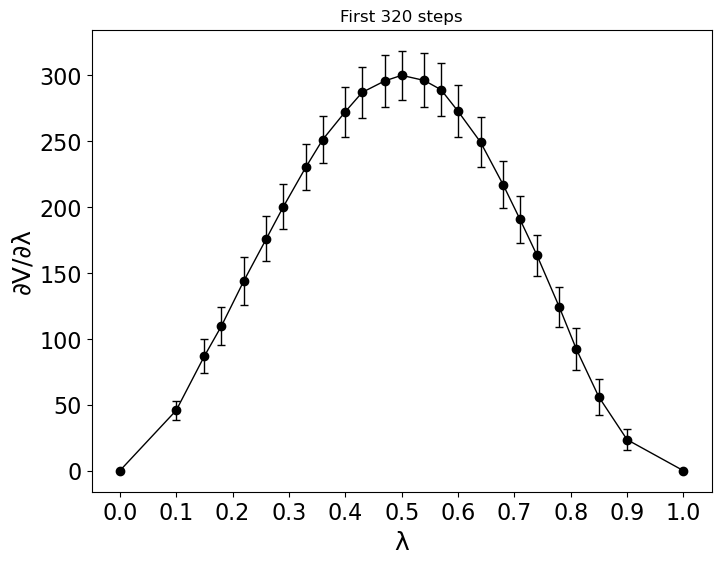

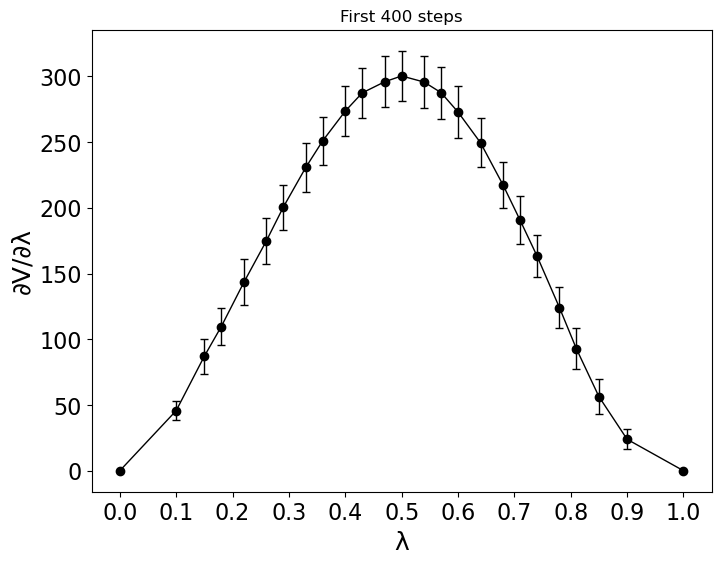

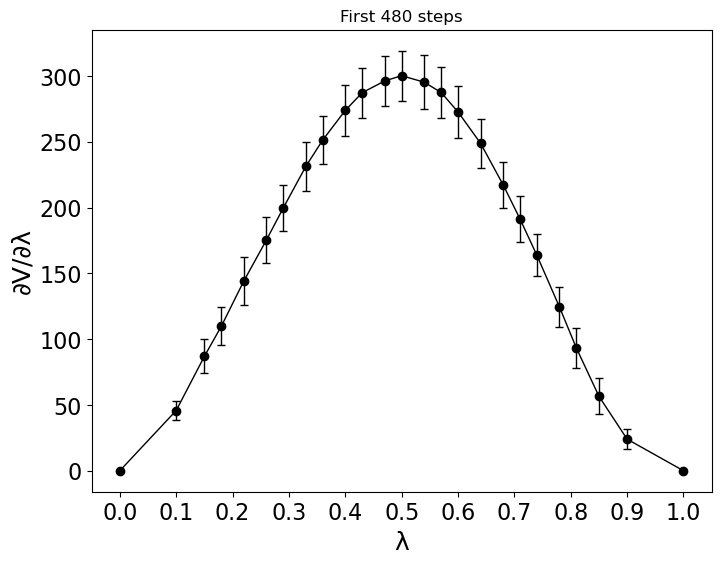

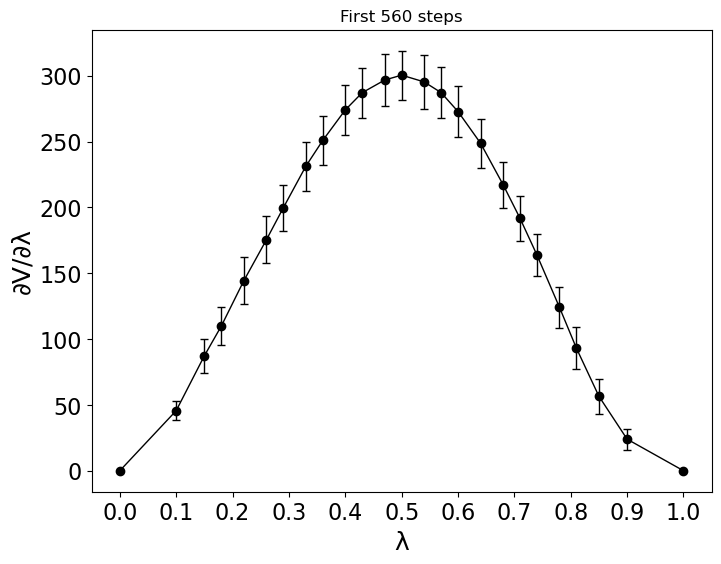

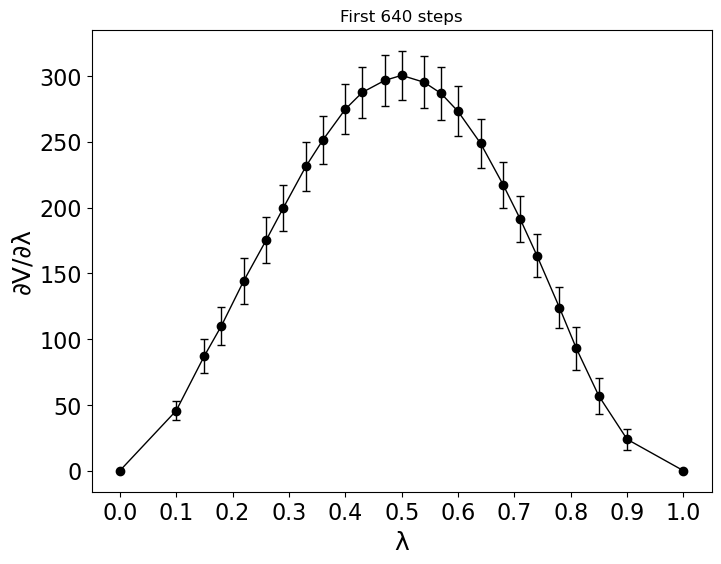

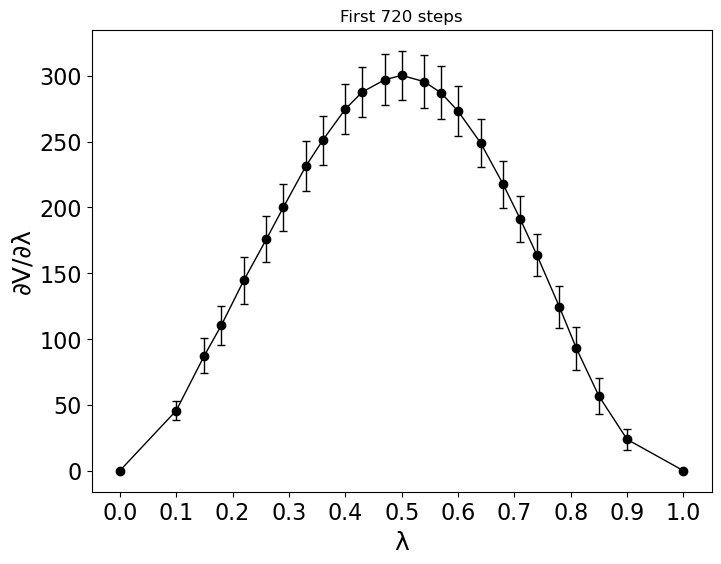

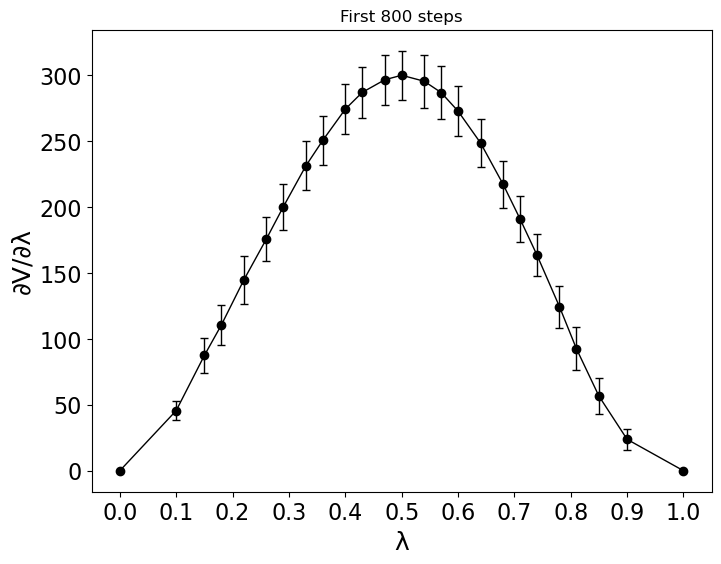

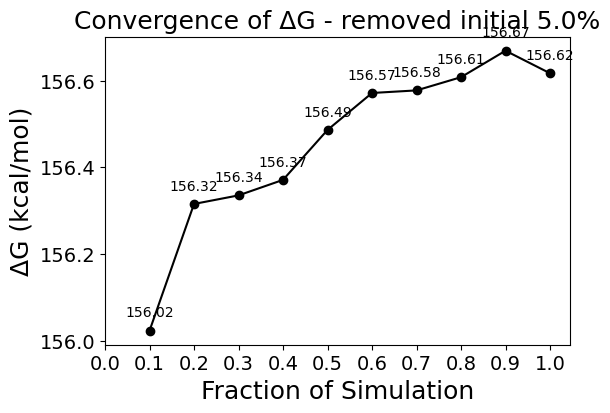

In [10]:
fa.plot_convergence(comp=COMPS[0],rep='rep1',fep_type='aces',cutoff=0.05,save=False,plot_curve_chunks=True)

You can also view the time evolution of the dU/dlambda for every lambda window through the simulation:

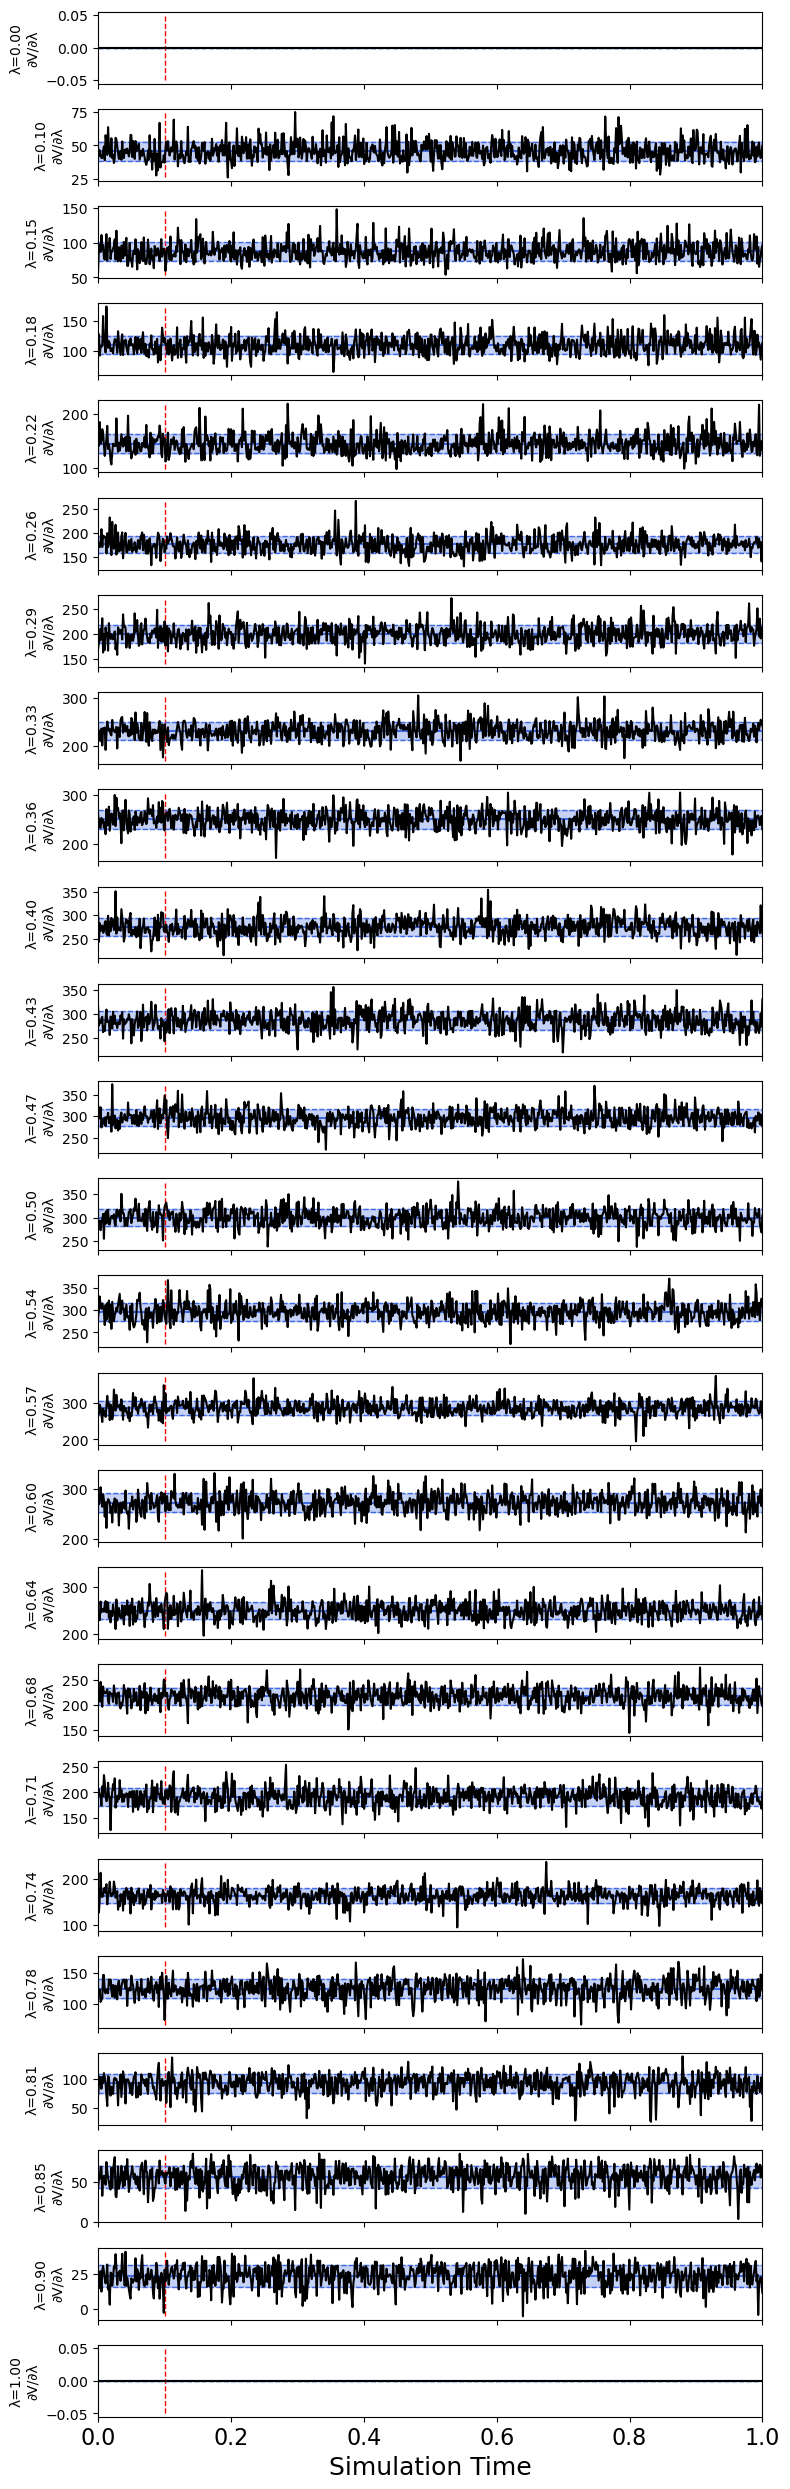

In [11]:
fa.plot_timeseries(comp=COMPS[0],rep='rep1',fep_type='aces',cutoff=0.1,save=False)